In [2]:
import pandas as pd
import numpy as np

In [157]:
df = pd.read_csv('titanic/train.csv')

In [158]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [159]:
for column_name, number_of_null in zip(df.columns, df.isnull().sum()):
    print(column_name, number_of_null)

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


### Check Name

In [160]:
from collections import Counter

In [161]:
for x in df['Name'].values:
    print(x)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

In [162]:
for idx, name in enumerate(df['Name']):
    if "(" in name and ")" in name:
        print(df['Name'].values[idx], df['SibSp'].values[idx], df['Parch'].values[idx])

Cumings, Mrs. John Bradley (Florence Briggs Thayer) 1 0
Futrelle, Mrs. Jacques Heath (Lily May Peel) 1 0
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) 0 2
Nasser, Mrs. Nicholas (Adele Achem) 1 0
Hewlett, Mrs. (Mary D Kingcome)  0 0
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) 1 0
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) 1 5
Spencer, Mrs. William Augustus (Marie Eugenie) 1 0
Ahlin, Mrs. Johan (Johanna Persdotter Larsson) 1 0
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) 1 0
Arnold-Franchi, Mrs. Josef (Josefine Franchi) 1 0
Harper, Mrs. Henry Sleeper (Myna Haxtun) 1 0
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson) 1 0
Nye, Mrs. (Elizabeth Ramell) 0 0
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson) 3 0
Doling, Mrs. John T (Ada Julia Bone) 0 1
Petroff, Mr. Pastcho ("Pentcho") 0 0
Robins, Mrs. Alexander A (Grace Charity Laury) 1 0
Weisz, Mrs. Leopold (Mathilde Francoise Pede) 1 0
Boulos, Mrs. Joseph (Sultana) 0 2
Hakkarainen, Mrs. Pekka

In [163]:
words = [word for sentence in df['Name'].apply(lambda x: x.split()) for word in sentence]

In [164]:
sorted(Counter(words).items(), key=lambda x:x[1], reverse=True)

[('Mr.', 517),
 ('Miss.', 182),
 ('Mrs.', 125),
 ('William', 62),
 ('John', 44),
 ('Master.', 40),
 ('Henry', 33),
 ('James', 24),
 ('Charles', 23),
 ('George', 22),
 ('Thomas', 21),
 ('Edward', 18),
 ('Joseph', 16),
 ('Johan', 15),
 ('Frederick', 15),
 ('Mary', 13),
 ('Richard', 13),
 ('Samuel', 13),
 ('Arthur', 13),
 ('Alfred', 12),
 ('Anna', 11),
 ('Jr', 10),
 ('Elizabeth', 9),
 ('Andersson,', 9),
 ('Alexander', 9),
 ('Ernest', 9),
 ('Robert', 9),
 ('Karl', 9),
 ('Peter', 9),
 ('J', 8),
 ('Leonard', 8),
 ('H', 8),
 ('Margaret', 8),
 ('Albert', 8),
 ('Martin', 8),
 ('Victor', 8),
 ('Maria', 7),
 ('Sage,', 7),
 ('Dr.', 7),
 ('de', 7),
 ('Johnson,', 6),
 ('E', 6),
 ('Panula,', 6),
 ('(Elizabeth', 6),
 ('Goodwin,', 6),
 ('Skoog,', 6),
 ('Francis', 6),
 ('Helen', 6),
 ('Frank', 6),
 ('Sofia', 6),
 ('Rev.', 6),
 ('Alice', 6),
 ('Carter,', 6),
 ('Rice,', 5),
 ('Anne', 5),
 ('Gustaf', 5),
 ('Walter', 5),
 ('David', 5),
 ('Patrick', 5),
 ('August', 5),
 ('Harry', 5),
 ('(Anna', 5),
 ('Annie'

In [165]:
list_of_titles = {'Mr.':'male', 'Miss.':'female', 'Mrs.':'female'}

In [166]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [167]:
for name, sex in zip(df['Name'], df['Sex']):
    for title in list_of_titles:
        if title in name:
            if list_of_titles[title] != sex:
                print(list_of_titles[title],sex)

### Apakah jenis kelamin memiliki korelasi terhadap keselamatan penumpang

In [168]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [169]:
df.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [170]:
"""
Female total: 233/314 = 74.2%
Male Total: 109/577 = 18.9%
"""

'\nFemale total: 233/314 = 74.2%\nMale Total: 109/577 = 18.9%\n'

### Apakah jenis class (Pclass) memiliki korelasi yang besar terhadap keselamatan penumpang

In [171]:
df['dependent'] = np.sum((df['Parch'], df['SibSp']),axis=0)

In [172]:
df.groupby(['Survived','dependent']).count()['PassengerId']

Survived  dependent
0         0            374
          1             72
          2             43
          3              8
          4             12
          5             19
          6              8
          7              6
          10             7
1         0            163
          1             89
          2             59
          3             21
          4              3
          5              3
          6              4
Name: PassengerId, dtype: int64

In [173]:
# Data survived = 0
print(374/(374+163))
print(72/(72+89))
print(43/(43+21))
print(8/(8+3))
print(12/(12+3))
print(19/(19+4))
print("="*50)
# Data survived = 1
print(163/(374+163))
print(89/(72+89))
print(21/(43+21))
print(3/(8+3))
print(3/(12+3))
print(4/(19+4))

0.6964618249534451
0.4472049689440994
0.671875
0.7272727272727273
0.8
0.8260869565217391
0.30353817504655495
0.5527950310559007
0.328125
0.2727272727272727
0.2
0.17391304347826086


In [174]:
df[['Survived','dependent', 'SibSp', 'Parch']].corr()

,Survived,dependent,SibSp,Parch
Survived,1.000000,0.016639,-0.035322,0.081629
dependent,0.016639,1.000000,0.890712,0.783111
SibSp,-0.035322,0.890712,1.000000,0.414838
Parch,0.081629,0.783111,0.414838,1.000000


### Apakah pangkat/gelar dari nama penumpang berkorelasi dengan keselamatan penumpang?

In [175]:
title_2 = []
for name, sex in zip(df['Name'], df['Sex']):
    is_break = False
    for title in list_of_titles:
        if title in name:
            title_2.append(title)
            is_break = True
            break
    if is_break == False:
        title_2.append(None)
df['title_2'] = title_2

In [176]:
df[['Title','title_2','Survived']].groupby(['Title']).mean().sort_values('Survived')

,Survived
Title,
Capt,0.000000
Don,0.000000
Jonkheer,0.000000
Rev,0.000000
Mr,0.156673
Dr,0.428571
Col,0.500000
Major,0.500000
Master,0.575000


In [177]:
df[['Title','title_2','Survived']].groupby(['title_2']).mean().sort_values('Survived')

,Survived
title_2,
Mr.,0.156673
Miss.,0.697802
Mrs.,0.792000


### Apakah yang muda yang survive?

In [178]:
import seaborn as sns

In [179]:
df.loc[pd.isna(df['Age'])]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

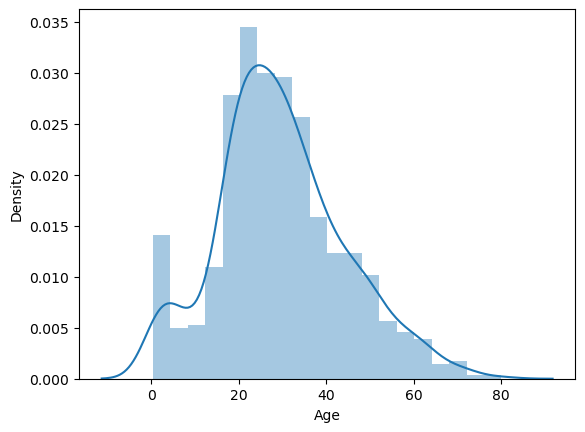

In [180]:
sns.distplot(df['Age'])

In [181]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
28.0


In [182]:
train_data_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(train_data_mean)

C:\Users\bdrex\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

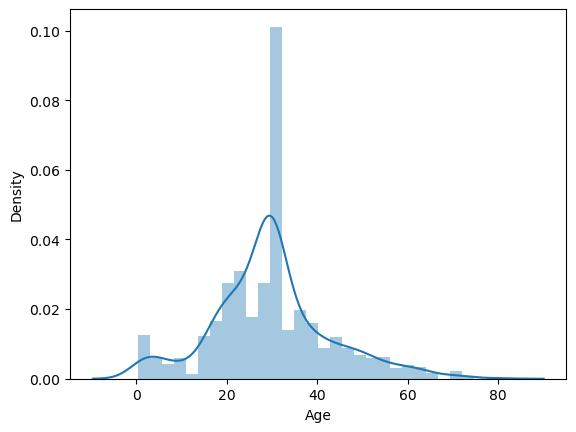

In [183]:
sns.distplot(df['Age'])

In [184]:
top_age = np.quantile(df['Age'], 0.975)
bottom_age = np.quantile(df['Age'], 0.025)

In [185]:
df.loc[df['Age']>top_age].shape

(22, 15)

In [186]:
df['Age'] = df['Age'].apply(lambda x: np.ceil(x))

In [187]:
print(df['Age'].median())
print(df['Age'].mean())

30.0
29.77104377104377


### Check Cabin attribute

In [188]:
df['Cabin'].value_counts()[:10]

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
F2             3
E101           3
D              3
C78            2
C93            2
Name: Cabin, dtype: int64

In [189]:
df['Cabin_class'] = df['Cabin'].apply(lambda x: x[0] if pd.isna(x) == False else None)

In [194]:
df[['Cabin_class','Survived']].groupby(['Cabin_class']).mean()

,Survived
Cabin_class,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [198]:
df[['Cabin_class','Survived']].groupby(['Cabin_class']).count()

,Survived
Cabin_class,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1


In [197]:
df.loc[df['Cabin_class'].isin(['B','D','E'])]['Pclass'].value_counts()

1    101
2      8
3      3
Name: Pclass, dtype: int64

In [199]:
df.loc[~df['Cabin_class'].isin(['B','D','E'])]['Pclass'].value_counts()

3    488
2    176
1    115
Name: Pclass, dtype: int64

# DF

In [219]:
value_counts_of_cabin = { x:y for x, y in df['Cabin'].value_counts().items()}

In [230]:
embarked_dict = {"S":0,"C":1,"Q":2}

In [233]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [234]:
df['Embarked'] = df['Embarked'].apply(lambda x: embarked_dict.get(x))

In [239]:
df['dependent'] = df['dependent'].apply(lambda x: x+1)

In [240]:
df['true_fare'] = [x/y for x,y in zip(df['Fare'], df['dependent'])]

In [250]:
df.groupby('Pclass').mean()['true_fare']

Pclass
1    52.936943
2    12.698832
3     8.094756
Name: true_fare, dtype: float64

In [254]:
average_price_per_cabin_class = {x: y for x, y in df.groupby(['Cabin_class']).mean()['true_fare'].items()}

In [256]:
average_price_per_cabin_class

{'A': 32.7681,
 'B': 69.37956595744681,
 'C': 52.273987005649715,
 'D': 34.384262626262625,
 'E': 29.177041145833332,
 'F': 9.05021282051282,
 'G': 4.963020833333333,
 'T': 35.5}

In [257]:
new_cabin_class = []
for cabin_class,true_fare in zip(df['Cabin_class'],df['true_fare']):
    if cabin_class is None:
        min_diff_class = None
        min_diff = 99999999
        for cabin_class_data, avg_fare in average_price_per_cabin_class.items():
            difference_of_fare = abs(true_fare-avg_fare)
            if  difference_of_fare < min_diff:
                min_diff_class = cabin_class_data
                min_diff = difference_of_fare
        new_cabin_class.append(min_diff_class)
    else:
        new_cabin_class.append(cabin_class)

In [259]:
df['new_cabin_class'] = new_cabin_class

In [261]:
df['new_cabin_class'].value_counts()

F    482
G    160
C     70
E     64
B     59
D     33
A     18
T      5
Name: new_cabin_class, dtype: int64

In [267]:
df[['Cabin_class','Survived']].groupby('Cabin_class').mean()

,Survived
Cabin_class,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [271]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,dependent,title_2,Cabin_class,true_fare,new_cabin_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,Mr.,None,3.62500,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,2,Mrs.,C,35.64165,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1,Miss.,None,7.92500,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,Mrs,2,Mrs.,C,26.55000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,Mr,1,Mr.,None,8.05000,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0,Rev,1,None,None,13.00000,F
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0,Miss,1,Miss.,B,30.00000,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,0.0,Miss,4,Miss.,None,5.86250,G
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0,Mr,1,Mr.,C,30.00000,C
